# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

4. Выполнить 3 с помощью "протягиваемых" формул.

## Лабораторная работа 7.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [4]:
import pandas as pd
reviews_sample = pd.read_csv("data/reviews_sample.csv", delimiter = ",")
recipes_sample = pd.read_csv("data/recipes_sample.csv", delimiter = ",", usecols = ['id', 'name', 'minutes', 'submitted', 'description', 'n_ingredients'], parse_dates = ['submitted'])
recipes_sample.head()

,name,id,minutes,submitted,description,n_ingredients
0,george s at the cove black bean soup,44123,90,2002-10-25,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,2003-07-26,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,2002-08-29,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [5]:
import xlwings as xw
procent5_reviews = reviews_sample.sample(frac = 0.05)
procent5_recipes = recipes_sample.sample(frac = 0.05)
wb = xw.Book()
wb.sheets.add('Рецепты')
sht_recipes = wb.sheets['Рецепты']
sht_recipes.range('A1').value = procent5_recipes
wb.sheets.add('Отзывы')
sht_reviews = wb.sheets['Отзывы']
sht_reviews.range('A1').value = procent5_reviews
wb.save()
wb.close()

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [3]:
seconds_arr = [i * 60 for i in procent5_recipes['minutes']]
wb = xw.Book('Книга1.xlsx')
sht_recipes = wb.sheets['Рецепты']
sht_recipes.range('H1').value = 'seconds_assign'
sht_recipes.range('H2').options(transpose=True).value = seconds_arr
wb.save()
wb.close()

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [4]:
wb = xw.Book('Книга1.xlsx')
sht_recipes = wb.sheets['Рецепты']
sht_recipes.range('I1').value = 'seconds_formula'
for i in range(2, len(procent5_recipes['minutes']) + 2):
    sht_recipes.range('I'+ str(i)).value = '=D' + str(i) + '*60'
wb.save()
wb.close()

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [5]:
wb = xw.Book('Книга1.xlsx')
sht_recipes = wb.sheets['Рецепты']
sht_recipes.range('A1:I1').font.bold = True
sht_recipes.range('A1:I1').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter
sht_reviews = wb.sheets['Отзывы']
sht_reviews.range('A1:I1').font.bold = True
sht_reviews.range('A1:I1').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter
wb.save()
wb.close()

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [6]:
wb = xw.Book('Книга1.xlsx')
sht_recipes = wb.sheets['Рецепты']
for i in range(2, len(procent5_recipes['minutes']) + 2):
    if sht_recipes.range('D' + str(i)).value < 5:
        sht_recipes.range('D' + str(i)).color = (0,255,0)
    elif sht_recipes.range('D' + str(i)).value > 10:
        sht_recipes.range('D' + str(i)).color = (255,0,0)
    else:
        sht_recipes.range('D' + str(i)).color = (255,255,0)
        
wb.save()
wb.close()

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [7]:
wb = xw.Book('Книга1.xlsx')
sht_recipes = wb.sheets['Рецепты']
sht_recipes.range('J1').value = 'n_reviews'
for i in range(2, len(procent5_recipes['minutes']) + 2):
    sht_recipes.range(f'J{i}').formula = f'=COUNTIF(Отзывы!D:D,C{i})'
wb.save()
wb.close()

## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [14]:
def validate(curr_sht, recip_sht):
    recipe_chk = recip_sht.range('C2:C' + str(recip_sht.range('C2').end('down').last_cell.row)).value
    for i in range(2, len(procent5_reviews['recipe_id'])):
        if curr_sht.range(f'F{i}').value not in [0,1,2,3,4,5] or curr_sht.range(f'D{i}').value not in recipe_chk:
            curr_sht.range((i,1),(i,10)).color = (255,0,0)
            
wb = xw.Book('Книга1.xlsx')
validate(wb.sheets['Отзывы'], wb.sheets['Рецепты'])
wb.save()
wb.close()

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [6]:
import csv
with open('./data/recipes_model.csv', 'r', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    data = [row for row in reader]
    csvfile.close()
wb = xw.Book('Книга1.xlsx')
sht_model = wb.sheets.add('Модель')
sht_model.range('A2').options(expand=True).value = data
wb.save()
wb.close()

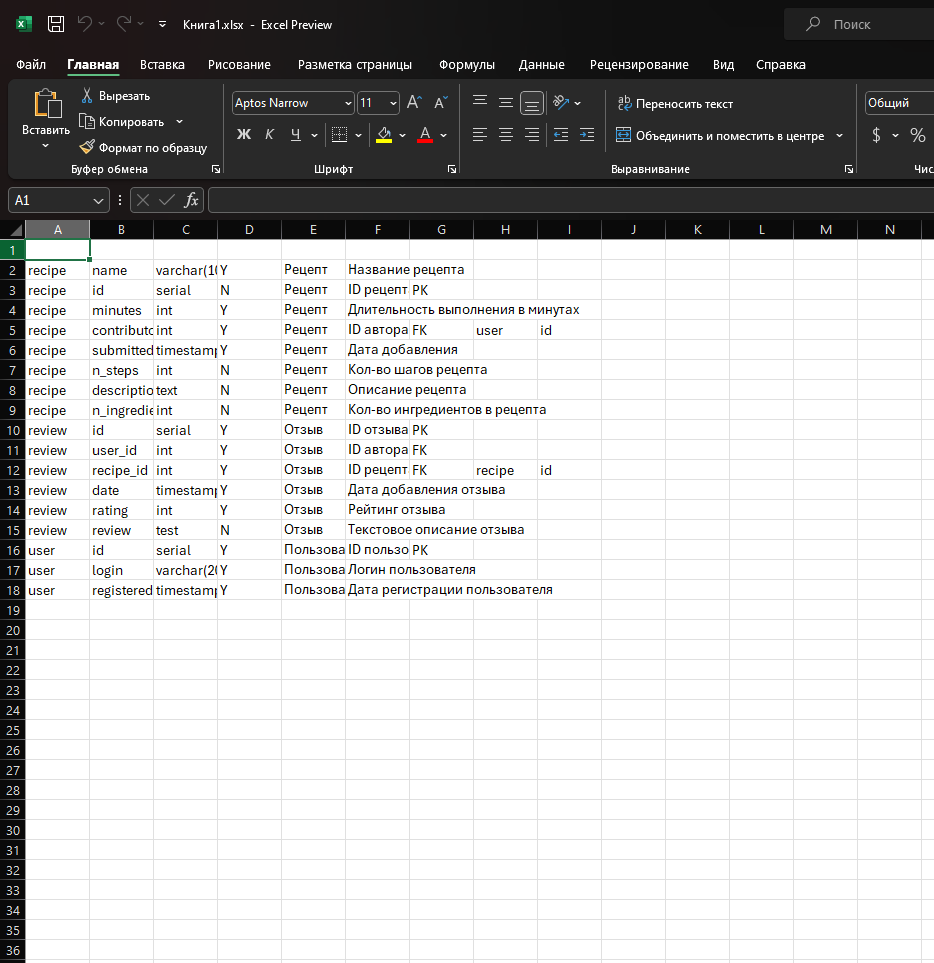

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [9]:
wb = xw.Book('Книга1.xlsx')
sht_model = wb.sheets["Модель"]
max_row = sht_model.range("A2").end('down').row
formula = "=CONCATENATE(B2, \" \", UPPER(C2), \" \", IF(E2=\"PK\", \"PRIMARY KEY\", IF(E2=\"FK\", \"REFERENCES \"&H2&\"(\"&I2&\")\", \"\")), IF(D2=\"Y\"&E2<>\"PK\", \" NOT NULL\", \"\"))"
sht_model.range('J2').formula = formula
sht_model.range('J2').api.AutoFill(sht_model.range('J2:J'+ str(max_row)).api, xw.constants.AutoFillType.xlFillDefault)
wb.save()
wb.close()

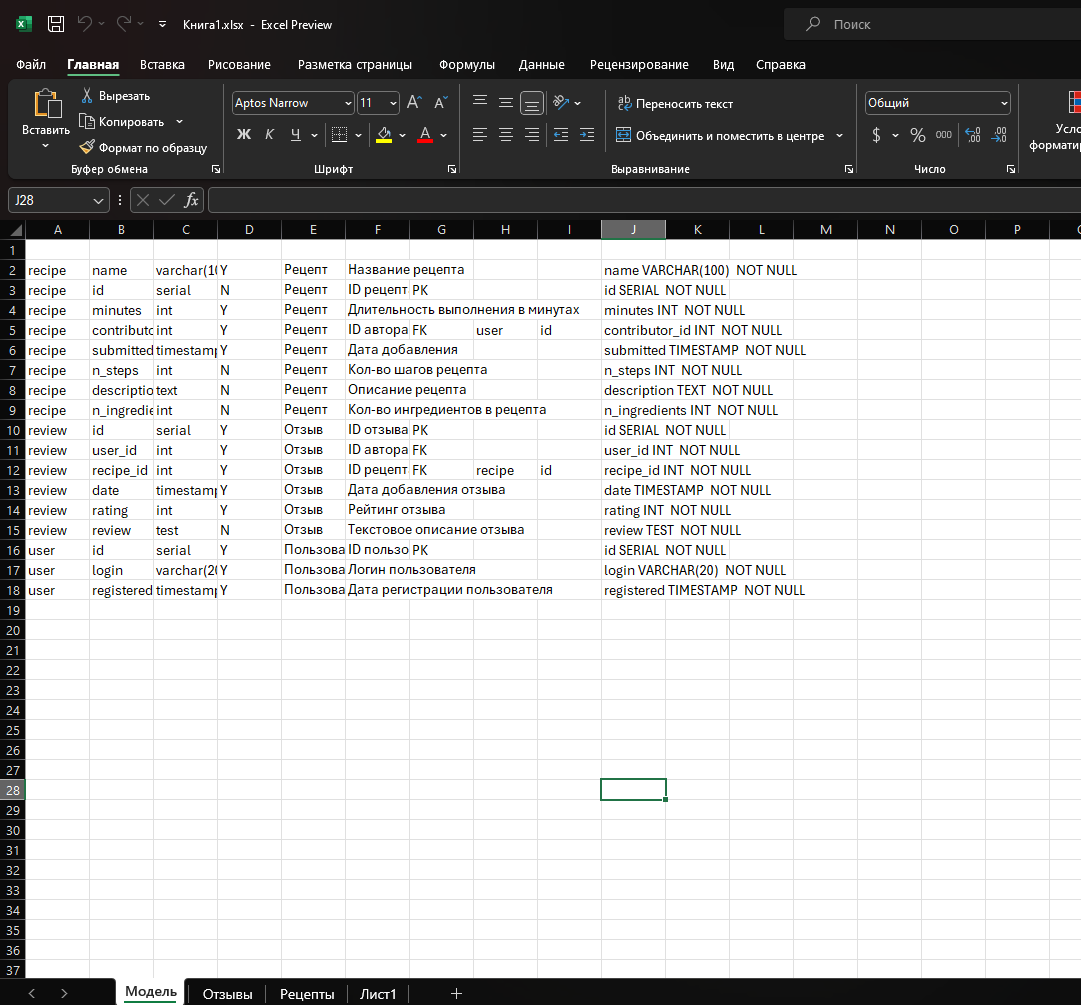

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [10]:
wb = xw.Book('Книга1.xlsx')
sht_model = wb.sheets["Модель"]
sht_model.range('A2:F2').color = 0x00ccff
sht_model.autofit('columns')
sht_model.range('A2:F2').font.Bold = True
sht_model.used_range.api.AutoFilter(Field=1)
wb.save()
wb.close()

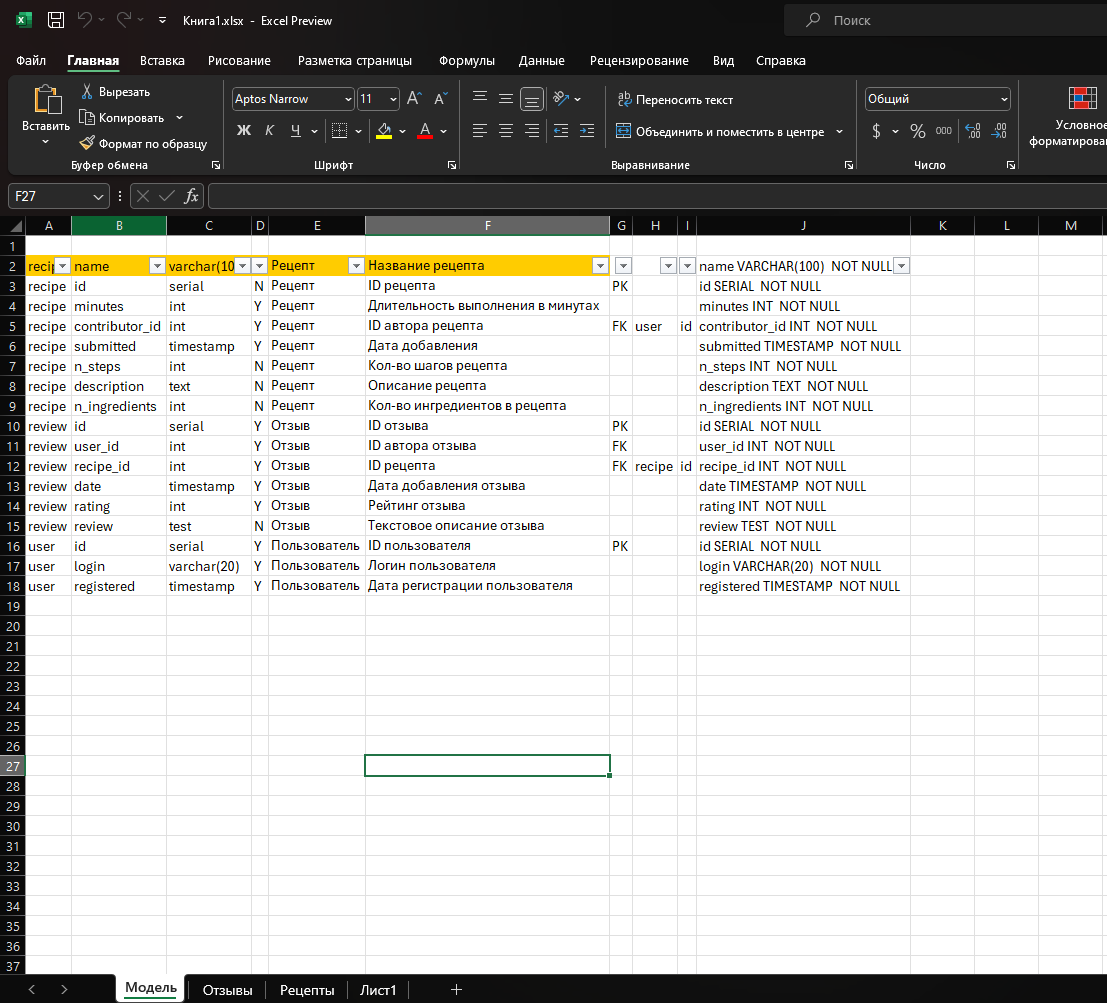

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 

TypeError: Don't know what to do with that image object

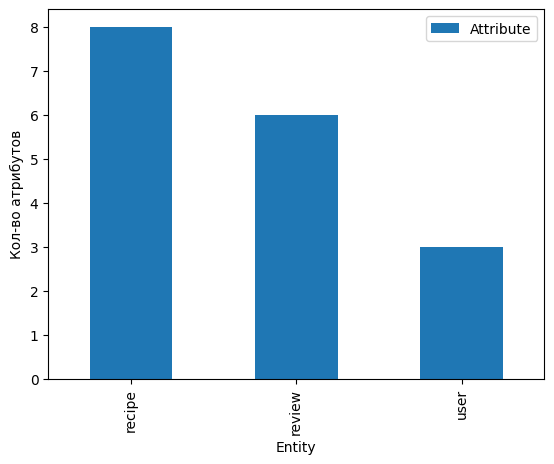

In [20]:
import matplotlib.pyplot as plt
wb = xw.Book('Книга1.xlsx')
data = wb.sheets['Модель'].range('A:B').options(pd.DataFrame, header=1, index=False).value
data.columns = ['Entity', 'Attribute']
grouped_data = data.groupby('Entity').count()
wb.sheets.add('Статистика')
sht_stat = wb.sheets['Статистика']
sht_stat.range('A1').value = grouped_data
ax = grouped_data.plot(xlabel='Entity', y="Attribute", ylabel='Кол-во атрибутов', kind='bar', legend=list(grouped_data.index.values))
fig = ax.get_figure()
sht_stat.pictures.add(fig, name='MyPlot', left = sht_stat.range('E2').left, top = sht_stat.range('E2').top, update=True)
wb.save()
wb.close()